# Plotting exercise

We will practice what we learned about plotting data on a 2D space.  
First, let's get the data.

In [31]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
%matplotlib inline

In [32]:
data = np.load('exercisedata.npz')
LON = data['LON']
LAT = data['LAT']      
u10 = data['u10']      # zonal velocity at 10m (m/s)
v10 = data['v10']      # meridional velocity at 10m (m/s)
T2m = data['T2']       # temperature at 2m (K)
LH = data['LH']        # latent heat (W/m2)
Psfc = data['Psfc']    # surface pressure (Pa)
w = data['w']          # vertical velocity (m/s)
date = data['date']
mask = data['mask']    # land mask
mask = ma.masked_where(mask==1, mask)
mask += 1

## 1. Plot surface pressure

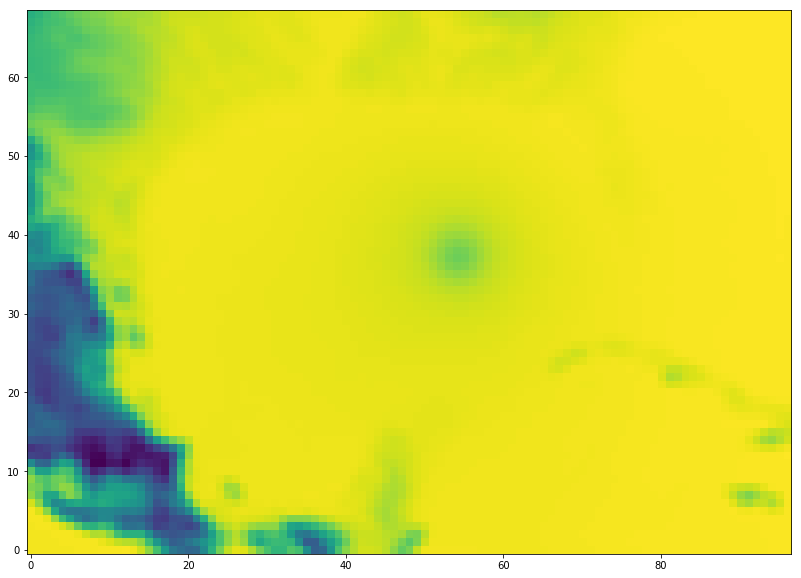

In [34]:
f, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.imshow(Psfc[-1, :, :]*1e-3, origin='lower')

## 2. Plot temperature at 2m

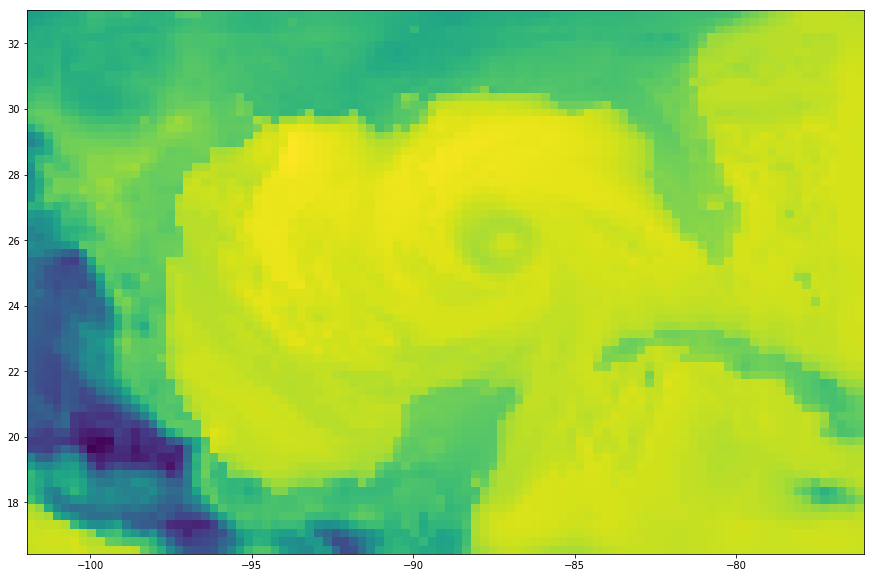

In [35]:
f, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.pcolormesh(LON, LAT, T2m[-1, :, :]-273.15)

## 3. Plot latent heat

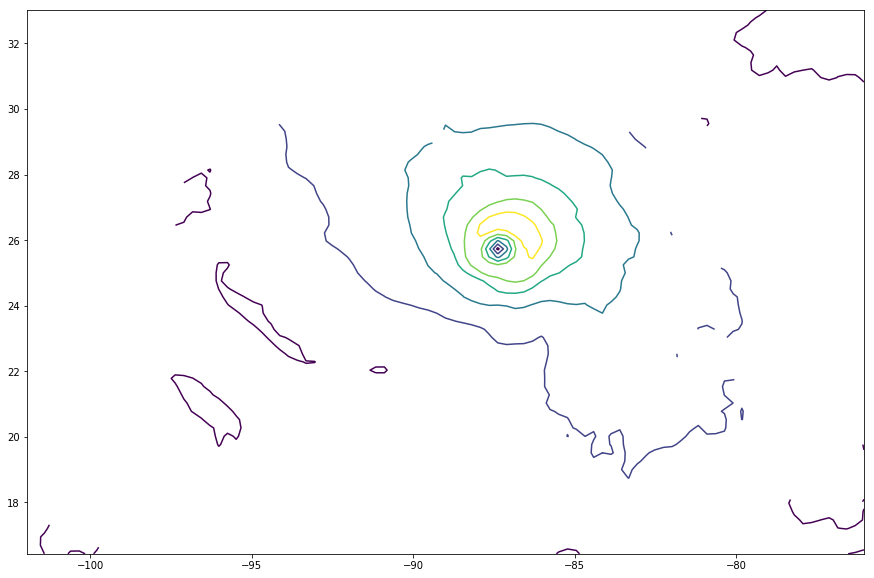

In [38]:
f, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.contour(LON, LAT, mask*LH[-1, :, :]-273.15)

## 4. Plot wind and its speed

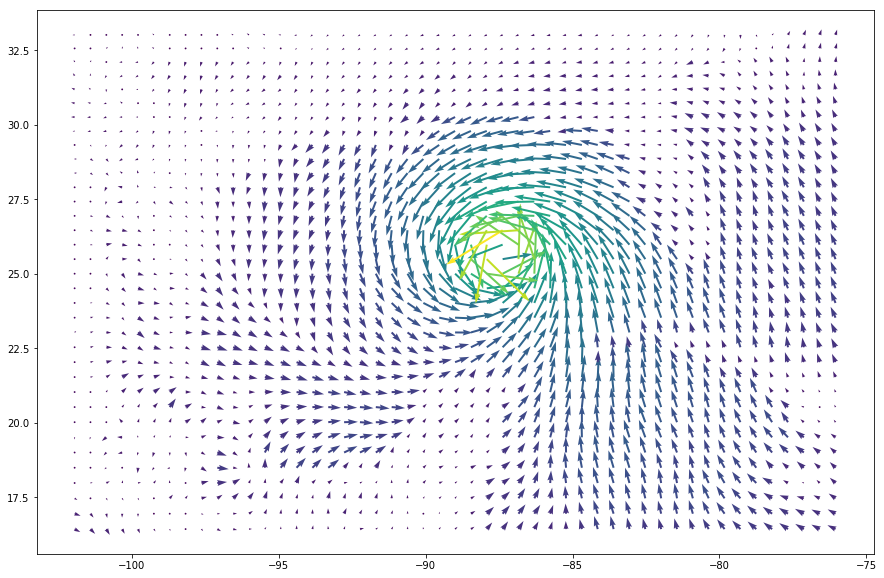

In [45]:
intv = 2
f, ax = plt.subplots(1, 1, figsize=(15, 10))
spd = (u10[-1,...]**2 + v10[-1,...]**2)**0.5
ax.quiver(LON[::intv, ::intv], LAT[::intv, ::intv], 
          u10[-1, ::intv, ::intv], v10[-1, ::intv, ::intv], spd[::intv, ::intv])


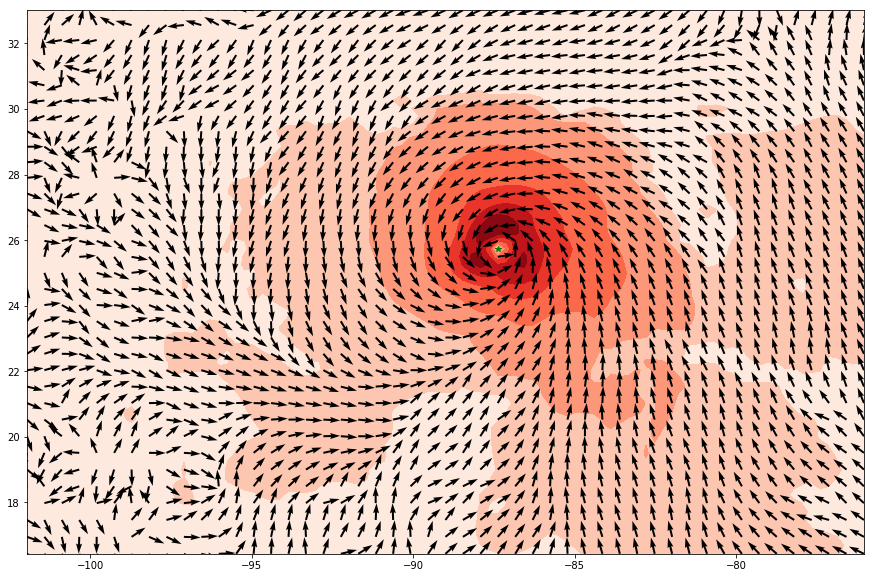

In [79]:
# Normalize the arrows:
nu10 = u10[-1,:,:] / (u10[-1,:,:]**2 + v10[-1,:,:]**2)**0.5;
nv10 = v10[-1,:,:] / (u10[-1,:,:]**2 + v10[-1,:,:]**2)**0.5;
intv = 2
f, ax = plt.subplots(1, 1, figsize=(15, 10))
spd = (u10[-1,...]**2 + v10[-1,...]**2)**0.5
ax.contourf(LON, LAT, spd, cmap='Reds')
ax.quiver(LON[::intv, ::intv], LAT[::intv, ::intv], 
          nu10[::intv, ::intv], nv10[::intv, ::intv], scale=.5e2)
ax.plot(LON[37, 54], LAT[37,54], 'g*')

## 5. Find the hurricane track

In [70]:
heye_lon = np.zeros(5)
heye_lat = np.zeros(5)

for i in range(u10.shape[0]):
    Pmasked = Psfc[i,:,:]*mask
    iy, ix = np.nonzero(Pmasked==Pmasked.min())
    heye_lon[i] = LON[iy, ix]
    heye_lat[i] = LAT[iy, ix]

/Users/hajsong/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Hurricane Katrina, 2005-08-28 12:00:00')

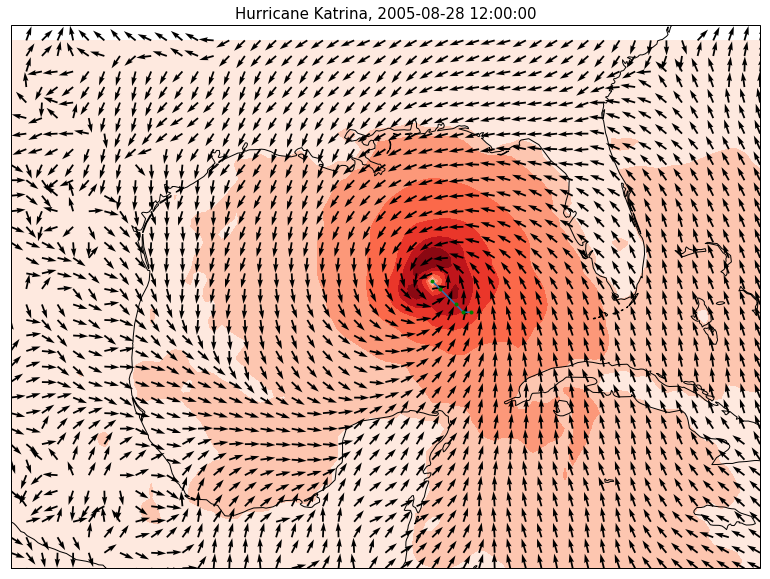

In [80]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(1, 1, 1, projection = ccrs.Mercator())
ax.coastlines('50m')
# ax.stock_img()
ax.set_extent((LON.min(), LON.max(), LAT.min(), LAT.max()))
ax.contourf(LON, LAT, spd, cmap='Reds',transform = ccrs.PlateCarree())
ax.quiver(LON[::intv, ::intv], LAT[::intv, ::intv], 
          nu10[::intv, ::intv], nv10[::intv, ::intv], scale=.5e2, transform = ccrs.PlateCarree())
ax.plot(heye_lon, heye_lat, transform = ccrs.PlateCarree())
ax.plot(heye_lon, heye_lat, 'g.', transform = ccrs.PlateCarree())
ax.grid('on')
ax.set_title("Hurricane Katrina, "+str(date[-1]), fontsize=15)